<a href="https://colab.research.google.com/github/anuragverse/ML-Workshop/blob/main/ML_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
data=pd.read_csv('placement.csv')
x=data.iloc[:,:-1].values.reshape(-1,1)
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
y_means=kmeans.predict(x)

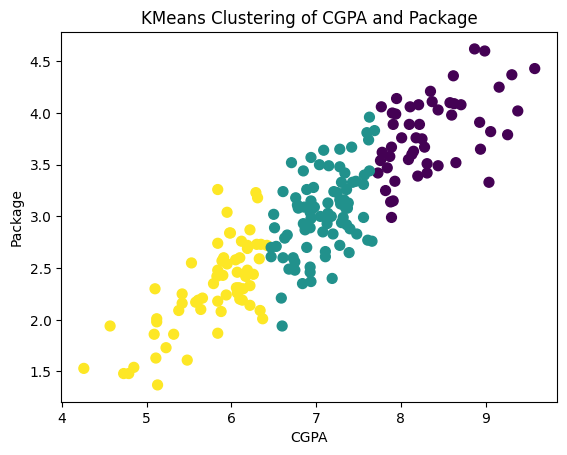

In [31]:
import matplotlib.pyplot as plt

plt.scatter(x, data['package'], c=y_means, s=50, cmap='viridis')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('KMeans Clustering of CGPA and Package')
plt.show()


    Student ID        Name  Age   GPA  Cluster
0            1   Student 1   24  3.79        1
1            2   Student 2   21  3.52        1
2            3   Student 3   22  3.18        1
3            4   Student 4   24  2.52        2
4            5   Student 5   20  3.91        1
5            6   Student 6   22  3.34        1
6            7   Student 7   22  3.08        2
7            8   Student 8   24  2.52        2
8            9   Student 9   19  2.85        0
9           10  Student 10   20  2.86        0
10          11  Student 11   24  3.52        1
11          12  Student 12   20  3.41        0
12          13  Student 13   20  3.75        1
13          14  Student 14   22  2.76        2
14          15  Student 15   21  3.09        0
15          16  Student 16   20  2.77        0
16          17  Student 17   23  3.63        1
17          18  Student 18   22  3.14        2
18          19  Student 19   19  2.81        0
19          20  Student 20   21  3.35        1
20          2

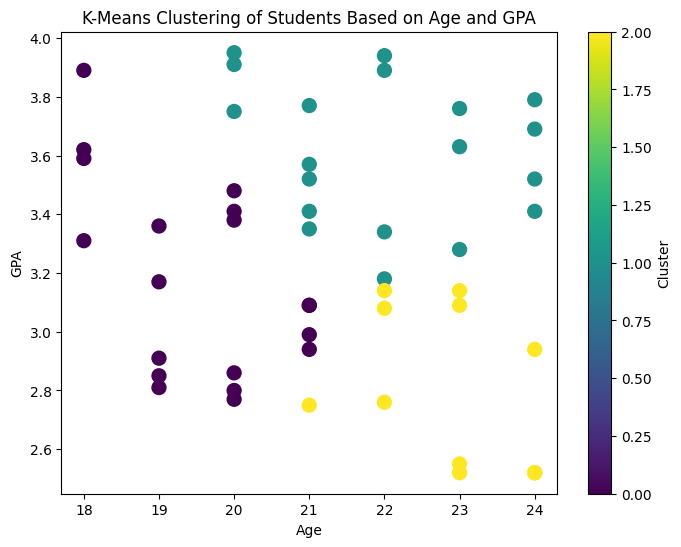

In [75]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
np.random.seed(42)
num_students = 50  # Number of students
ages = np.random.randint(18, 25, size=num_students)  # Ages between 18 and 25
gpas = np.round(np.random.uniform(2.5, 4.0, size=num_students), 2)  # GPAs between 2.5 and 4.0
grades = np.random.choice(['A', 'B', 'C'], size=num_students)  # Random grades
departments = np.random.choice(['Computer Science', 'Mathematics', 'Physics', 'Chemistry'], size=num_students)
student_data = {
    'Student ID': range(1, num_students + 1),
    'Name': [f'Student {i}' for i in range(1, num_students + 1)],
    'Department': departments,
    'Age': ages,
    'Grade': grades,
    'GPA': gpas
}

df = pd.DataFrame(student_data)
csv_file_path = '/content/student.csv'
df.to_csv(csv_file_path, index=False)
df = pd.read_csv(csv_file_path)
features = df[['Age', 'GPA']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(df[['Student ID', 'Name', 'Age', 'GPA', 'Cluster']])
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['GPA'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('GPA')
plt.title('K-Means Clustering of Students Based on Age and GPA')
plt.colorbar(label='Cluster')
plt.show()

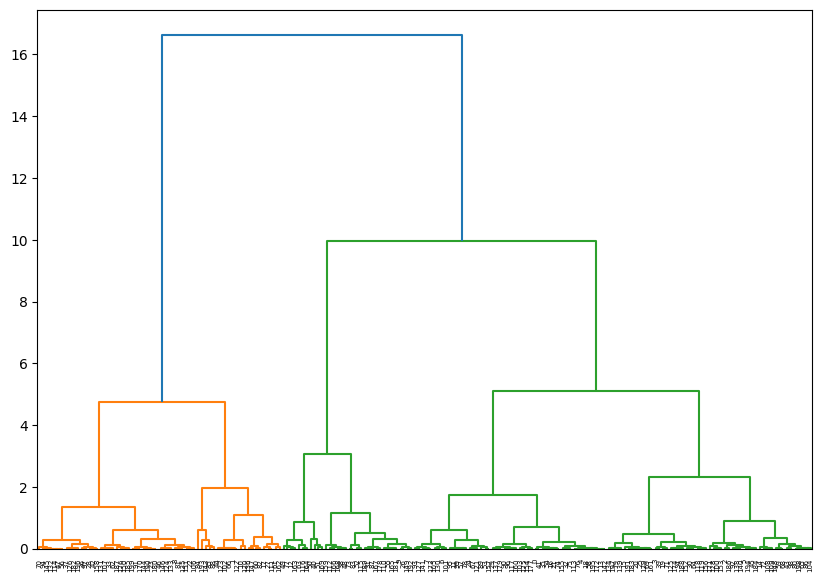

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
z=linkage(x,method='ward')
plt.figure(figsize=(10,7))
dendrogram(z)
plt.show()


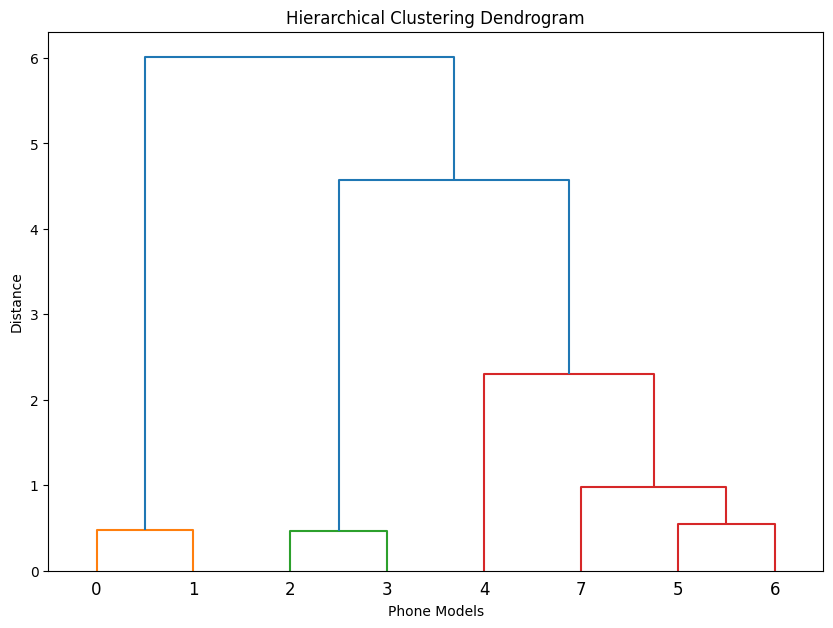

      Brand         Model  Screen Size (inches)  ...  Resolution Height  Price (rs)  Cluster
0     Apple     iPhone 14                  6.10  ...               1170       79900        0
1     Apple     iPhone 13                  6.10  ...               1170       69900        0
2   Samsung    Galaxy S23                  6.10  ...               1080       79900        0
3   Samsung    Galaxy S22                  6.20  ...               1080       84900        0
4  Motorola     Moto G200                  6.80  ...               1080       59900        0
5  Motorola  Moto Edge 30                  6.50  ...               1080       44900        0
6     Nokia     Nokia X30                  6.43  ...               1080       35000        0
7     Nokia     Nokia G60                  6.58  ...               1080       25000        0

[8 rows x 7 columns]


In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Step 1: Load the mobile display data (same as before)
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply Agglomerative Hierarchical Clustering
# Use distance_threshold instead of n_clusters
agglomerative_clustering = AgglomerativeClustering(distance_threshold=50, linkage='ward', n_clusters=None)
df['Cluster'] = agglomerative_clustering.fit_predict(scaled_features)

# Step 6: Visualize the dendrogram to understand the clustering hierarchy
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Phone Models')
plt.ylabel('Distance')
plt.show()

# Step 7: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (rs)', 'Cluster']])

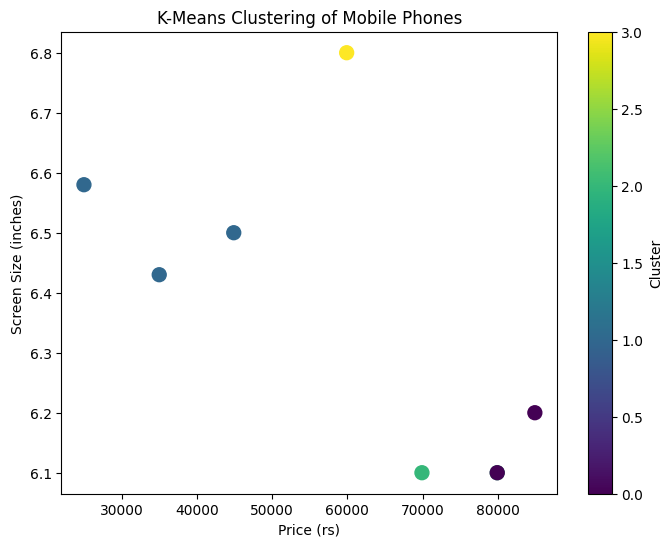

In [78]:
# Feature Selection and Scaling
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (rs)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters if needed
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualization (example: using scatter plot for Price vs. Screen Size)
plt.figure(figsize=(8, 6))
plt.scatter(df['Price (rs)'], df['Screen Size (inches)'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Price (rs)')
plt.ylabel('Screen Size (inches)')
plt.title('K-Means Clustering of Mobile Phones')
plt.colorbar(label='Cluster')
plt.show()
